## 회귀분석 가상 데이터 생성

- 회귀분석 식
- make_regression( )

---

### 01. 회귀분석 식

1) 정의

$$ y = b + xw + e $$ 

- 종속변수(y) = bias(b) + 독립변수(x)*가중치(w) + 오차(e)


- 정확한 선형관계가 아니라 다변수 정규분포인 오차(disturbance) $e$ 를 가짐 ($e$는 정규분포를 따름)


- $b$는 y 절편 즉, 바이어스(bias)를 뜻하고 $x$, $y$, $w$, $b$, $e$는 모두 스칼라

2) 복수 데이터 경우

$$ y = b + Xw + e $$ 

- $y$는 $N$차원 벡터($N$은 데이터의 갯수)


- $X$는 $N\times M$차원 행렬($M$은 입력 차원)


- $w$는 $M$차원 벡터, $e$는 $N$차원 벡터이다

---

### 02. make_regression( )

내부적으로 입력(독립 변수) 데이터인 x, 오차 e, 계수 w, b를 확률적으로 생성한 후, 위 관계식에 따라 출력(종속 변수) 데이터 y를 계산

#### 1. 함수 설명

#### 1) 입력 인수

- `n_samples` : 표본의 갯수, 정수 (옵션, 디폴트 100)


- `n_features` : 독립 변수(feature)의 수(차원), 정수 (옵션, 디폴트 100)


- `n_targets` : 종속 변수(target)의 수(차원), 정수 (옵션, 디폴트 1)


- `bias` : 절편, 실수 (옵션, 디폴트 0.0)


- `noise` : 출력 즉, 종속 변수에 더해지는 오차의 표준 편차, 실수 (옵션, 디폴트 0.0)


- `coef` : 선형 모형의 계수(가중치) 출력 여부 (True, False), 불리언 (옵션, 디폴트 False)


- `random_state` : 난수 발생용 시작값, 정수 (옵션, 디폴트 None) 

#### 2) 출력 값

- `X` : 독립 변수의 표본 데이터, [`n_samples`, `n_features`] 형상의 2차원 배열


- `y` : 종속 변수의 표본 데이터, [`n_samples`] 형상의 1차원 배열 또는 [`n_samples`, `n_targets`] 형상의 2차원 배열


- `coef` : [`n_features`] 형상의 1차원 배열 또는 [`n_features`, `n_targets`] 형상의 2차원 배열 

#### 3) 옵션 인수

* `n_informative` : 독립 변수중 실제로 종속 변수와 상관 관계가 있는 독립 변수의 수(차원), 정수 (옵션, 디폴트 10)
    
    
* `effective_rank`: 독립 변수중 서로 독립인 독립 변수의 수. 만약 None이면 모두 독립, 정수 또는 None (옵션, 디폴트 None)
   
    
* `tail_strength` : `effective_rank`가 None이 아닌 경우 독립 변수간의 상관관계를 결정하는 변수. 0.5면 독립 변수간의 상관관계가 없음, 0부터 1사이의 실수 (옵션, 디폴트 0.5)

#### 2. 1차원 함수

#### 1) 함수 불러와서 변수 지정하기

In [1]:
from sklearn.datasets import make_regression
# X는 독립변수, y는 종속변수, w는 가중치(계수)
X, y, w = make_regression(n_samples=10, n_features=1, bias=0, noise=0,
                          coef=True, random_state=0)

In [2]:
X # 독립변수 (random으로 생성)

array([[ 0.97873798],
       [ 2.2408932 ],
       [ 1.86755799],
       [ 0.95008842],
       [ 1.76405235],
       [ 0.4105985 ],
       [-0.97727788],
       [ 0.40015721],
       [-0.10321885],
       [-0.15135721]])

In [3]:
y # 종속변수

array([ 77.48913677, 177.41712535, 147.85924209,  75.22087885,
       139.66444108,  32.50811146, -77.37353667,  31.6814481 ,
        -8.17209494, -11.98332915])

In [4]:
w # 선형모형의 계수 (가중치)

array(79.17250381)

$\rightarrow$ $y = 79.1725 x $ (bias = 0, noise = 0)

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

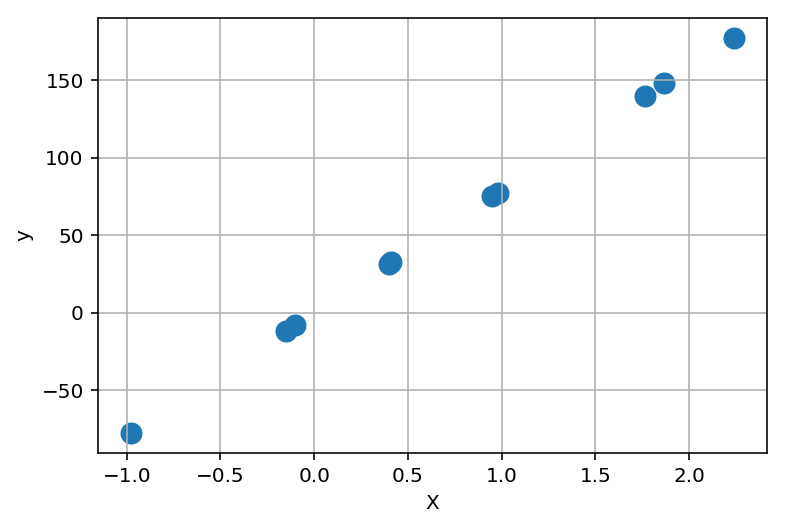

In [6]:
plt.scatter(X, y, s=100)
plt.xlabel("X")
plt.ylabel("y")
plt.grid(True)

plt.show()

#### 2) 선형 회귀분석 특징

- `noise` 인수를 증가시키면  $\text{Var}[e]$가 증가 (분산이 커짐)


- `bias` 인수를 증가시키면 y 절편 $b$가 증가

In [7]:
X, y, w = make_regression(n_samples=50, n_features=1, bias = 10, noise = 10,
                          coef=True, random_state=0)

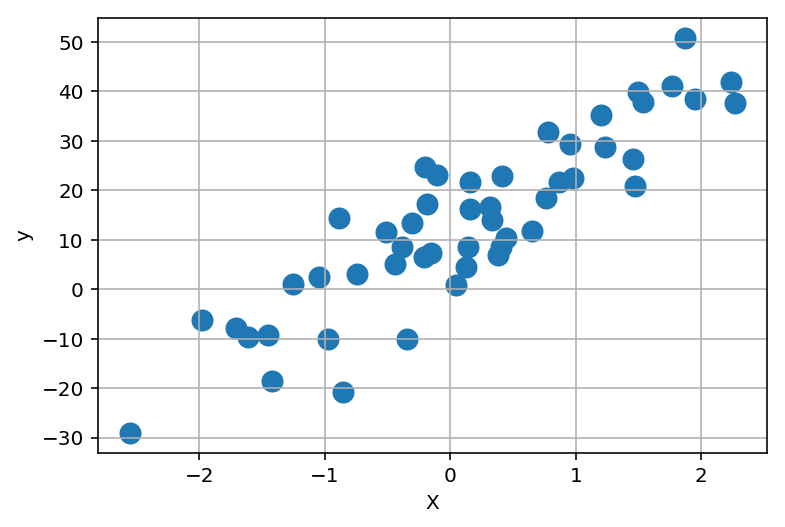

In [8]:
plt.scatter(X, y, s=100)
plt.xlabel("X")
plt.ylabel("y")
plt.grid(True)

plt.show()

$\rightarrow$ noise가 커져서 분포가 위의 그림보다 흩어짐


$\rightarrow$ y축의 숫자를 확인해보면 bias가 반영되었음을 확인할 수 있음

#### 3. 2차원 함수

#### 1) Basic

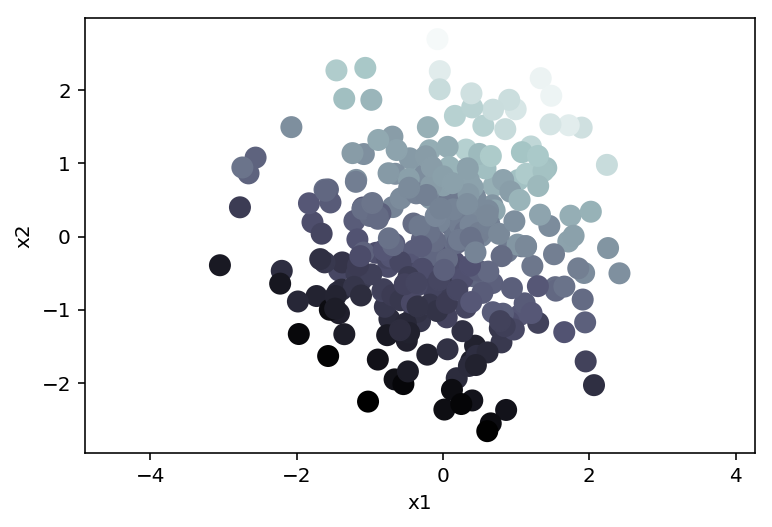

In [9]:
X, y, w = make_regression(n_samples=300, n_features=2, noise=10, 
                          coef=True, random_state=0)

plt.scatter(X[:,0], X[:,1], c=y, s=100, cmap=mpl.cm.bone)

plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")

plt.show()

$\rightarrow$  명암의 색이 옅을수록 값이 커짐


$\rightarrow$  x1, x2가 커질수록 y는 커지는 것을 확인할 수 있음

#### 2) y값에 영향을 미치는 독립 변수가 하나일 때

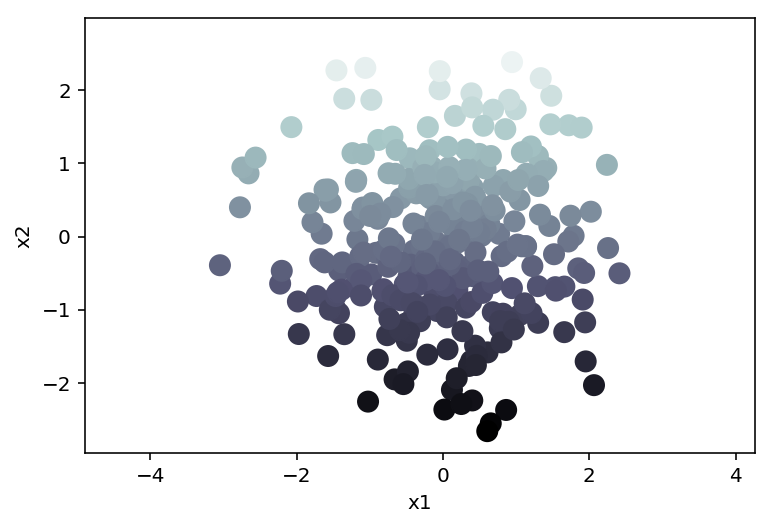

In [10]:
# n_informative=1 설정
X, y, w = make_regression(n_samples=300, n_features=2, n_informative=1, 
                          noise=0, coef=True, random_state=0) 

plt.scatter(X[:,0], X[:,1], c=y, s=100, cmap=mpl.cm.bone)

plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")

plt.show()

$\rightarrow$ x2만 영향을 미치도록 조정

#### 3) 상관관계를 증가시키고 싶을 때

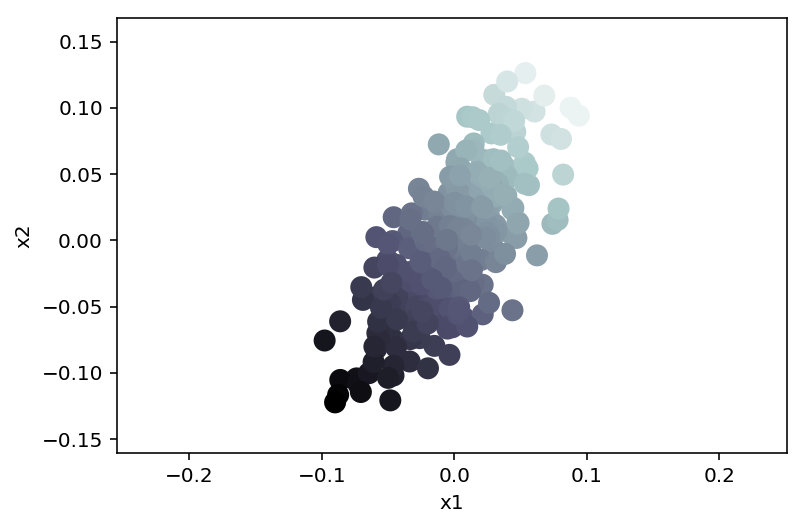

In [11]:
# tail_strength=0으로 설정
X, y, w = make_regression(n_samples=300, n_features=2, effective_rank=1, noise=0, 
                          tail_strength=0, coef=True, random_state=0)

plt.scatter(X[:,0], X[:,1], c=y, s=100, cmap=mpl.cm.bone)

plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")

plt.show()

$\rightarrow$ x1, x2인데 rank가 1이라는 의미는 두개가 비슷해서 하나로 간주해도 의미가 없음 (다중 공선성)

---

### 연습문제

#### `연습문제1`

`make_regression`과 같은 기능을 하는 함수 `make_regression2`를 만들어라. 단 `make_regression2`는 `coef=True` 라고 가정한다. 즉 항상 가중치 계수를 반환한다. 또한 1차원 독립 변수만 생성할 수 있으므로 다음과 같은 인수만 가진다.

    * n_samples
    * bias
    * noise
    * random_state

#### `정답`

In [12]:
def make_regression2(n_samples, bias, noise, random_state):
    import scipy as sp
    import random
    
    np.random.seed(random_state)
    b = int(bias)
    X = np.random.randn(n_samples)
    w = np.random.rand()*100
    e = sp.stats.norm(0,noise).rvs(n_samples)
    y = b + X*w + e
    
    return X, y, w

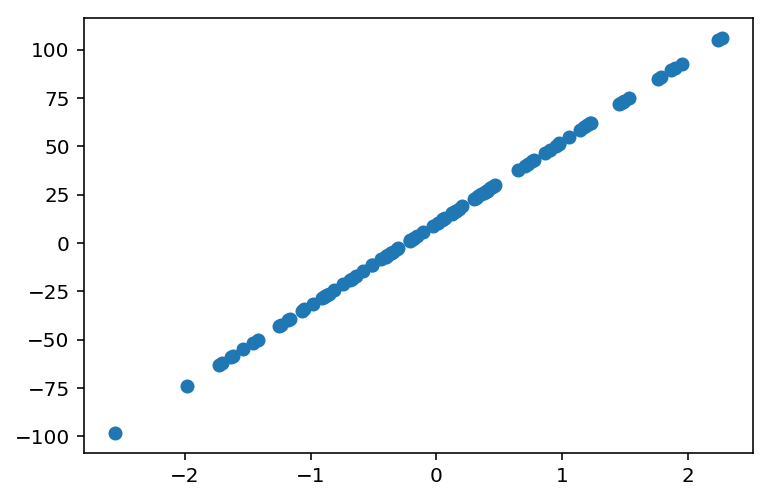

In [13]:
X, y, w = make_regression2(n_samples = 100, bias = 10, noise = 0, random_state = 0)
plt.scatter(X, y)
plt.show()

In [14]:
import scipy as sp
sp.stats.norm(0,0).rvs(30)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

#### `연습문제2`

`make_regression2` 함수에 `coef` 인수를 추가하여  `make_regression3` 함수를 만들어라. `make_regression3` 함수는 가중치를 스스로 생성하지 않고 `coef` 인수로 받은 가중치 계수 값을 그대로 사용하며  가중치 계수를 반환하지 않는다.

#### `정답`

In [15]:
def make_regression3(n_samples, bias, noise, random_state, coef):
    import scipy as sp
    import random
    
    np.random.seed(random_state)
    b = int(bias)
    X = np.random.randn(n_samples)
    w = int(coef)
    e = sp.stats.norm(0,noise).rvs(n_samples)
    y = b + X*w + e
    
    return X, y

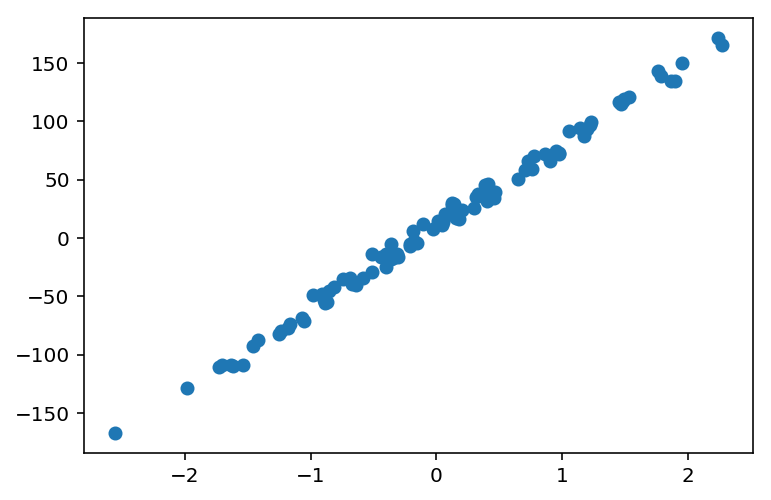

In [16]:
X, y = make_regression3(n_samples = 100, bias = 10, noise = 5, random_state = 0, coef = 70)
plt.scatter(X, y)
plt.show()